In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.stats as st
import seaborn as sns
sns.set()
# параметр для задания толщины линии# парам 
plt.rcParams['lines.linewidth'] = 1
# параметр для задания ширины точек
plt.rcParams['lines.markersize'] = 6
# параметр для задания шрифта осей x и y (цифр на осях)
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
# параметр для задания шрифта на осях
plt.rcParams['legend.fontsize'] = 24
# параметр для задания шрифта заголовка
plt.rcParams['axes.titlesize'] = 36
# параметр для задания шрифта осей x и y (название оси)
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['figure.figsize'] = (8.0, 4.0)
# параметр для задания шрифта вспомагательных записей на графику (annotate или text)
plt.rcParams['font.size'] = 10

Загружаем данные

In [2]:
X_train = np.load("/Users/pandreev/psad-2020/regression/regression_x_train.npy")
Y_train = np.load("/Users/pandreev/psad-2020/regression/regression_y_train.npy")
X_test = np.load("/Users/pandreev/psad-2020/regression/regression_x_test.npy")

In [3]:
print(X_train.shape)
print(Y_train.shape)

(286, 604, 35)
(286, 604)


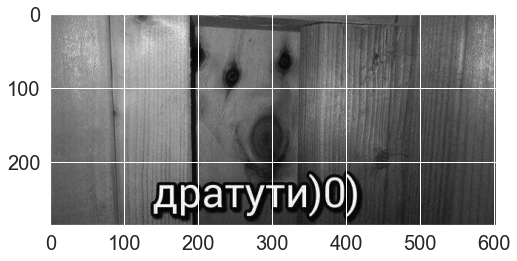

In [4]:
plt.imshow(Y_train,cmap='gray')

In [5]:
X = X_train.reshape(-1, 35)
Y = Y_train.reshape(-1)

Посмотрим, что дает наивное посроение модели по исходным признакам:

In [51]:
model0 = sm.OLS.from_formula("Y ~ X", data={"X" : X, "Y":Y}).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                 6.157e+04
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        15:22:13   Log-Likelihood:             2.2548e+05
No. Observations:              172744   AIC:                        -4.509e+05
Df Residuals:                  172737   BIC:                        -4.509e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.217e-06   3.96e-09    560.112      0.000    2.21e-06    2.22e-06
X[0]       -1.722e-07   4.71e-10   -365.889      0.000   -1.73e-07   -1.71e-07
X[1]        1.823e-06   5.36e-09    340.454      0.000    1.81e-06    1.83e-06
X[2]        2.797e-06   4.39e-09    636.411      0.000    2.79e-06    2.81e-06
X[3]           0.0160      0.000     42.012      0.000       0.015       0.017
X[4]           0.0133      0.000     35.243      0.000       0.013       0.014
X[5]       -1.429e-06   2.68e-09   -533.443      0.000   -1.43e-06   -1.42e-06
X[6]         3.18e-06   7.59e-09    419.135      0.000    3.17e-06     3.2e-06
X[7]        1.871e-06   3.18e-09    589.149      0.000    1.87e-06    1.88e-06
X[8]           0.0160      0.000     42.002      0.000       0.015       0.017
X[9]           0.0133      0.000     35.245      0.000       0.013       0.014
X[10]       1.581e-07   2.02e-09     78.291      0.000    1.54e-07    1.62e-07
X[11]       4.313e-07   5.51e-09     78.291      0.000     4.2e-07    4.42e-07
X[12]       8.381e-07   1.07e-08     78.291      0.000    8.17e-07    8.59e-07
X[13]       2.795e-05   3.57e-07     78.291      0.000    2.72e-05    2.86e-05
X[14]          0.0002   4.96e-07    427.850      0.000       0.000       0.000
X[15]          0.0001   2.36e-07    427.850      0.000       0.000       0.000
X[16]          0.0005   1.26e-06    427.850      0.000       0.001       0.001
X[17]          0.0005    1.2e-06    427.850      0.000       0.001       0.001
X[18]       4.835e-05   7.63e-08    633.760      0.000    4.82e-05    4.85e-05
X[19]          0.0003   4.42e-07    633.760      0.000       0.000       0.000
X[20]          0.0008    1.3e-06    633.760      0.000       0.001       0.001
X[21]          0.0003   5.51e-07    633.760      0.000       0.000       0.000
X[22]      -1.426e-06   5.32e-08    -26.782      0.000   -1.53e-06   -1.32e-06
X[23]      -2.968e-05   1.11e-06    -26.782      0.000   -3.19e-05   -2.75e-05
X[24]      -2.154e-05   8.04e-07    -26.782      0.000   -2.31e-05      -2e-05
X[25]      -3.056e-05   1.14e-06    -26.782      0.000   -3.28e-05   -2.83e-05
X[26]      -7.392e-06   2.69e-07    -27.459      0.000   -7.92e-06   -6.86e-06
X[27]      -6.281e-06   2.29e-07    -27.459      0.000   -6.73e-06   -5.83e-06
X[28]      -2.392e-05   8.71e-07    -27.459      0.000   -2.56e-05   -2.22e-05
X[29]      -4.091e-05   1.49e-06    -27.459      0.000   -4.38e-05    -3.8e-05
X[30]      -1.334e-06   2.38e-09   -560.112      0.000   -1.34e-06   -1.33e-06
X[31]       4.107e-06   7.33e-09    560.112      0.000    4.09e-06    4.12e-06
X[32]      -2.993e-08   5.34e-11   -560.112      0.000      -3e-08   -2.98e-08
X[33]      -2.345e-06   4.19e-09   -560.112      0.000   -2.35e-06   -2.34e-06
X[34]       1.824e-06   3.26e-09    560.112      0.000    1.82e-06    1.83e-06
==

Как видно, качество наивной модели довольно низкое, попробуем детально посмотреть на распределения признаков 

In [50]:
# Во-первых посчитаем уникальные значения для каждого признака
print([len(set(X[:, i])) for i in range(35)])

[2, 2, 2, 98899, 100611, 2, 2, 2, 98899, 100611, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 98899, 98899, 98899, 98899, 100611, 100611, 100611, 100611, 1, 1, 1, 1, 1]


Признаки разбиваются на 4 категории:
1. Константные (мы строим модель, которая и так содержит смещение, поэтому для нас они мусорные)
2. Бинарные 
3. Вещественные признаки с 98899 значениями
4. Вещественные признаки с 100611 значениями

Группируем признаки на данные категории:

In [53]:
groups = {1 : [], 2 : [], 98899 : [], 100611 : []}
for i in range(35):
    groups[len(set(X[:, i]))].append(i)
groups

{1: [30, 31, 32, 33, 34],
 2: [0, 1, 2, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
 98899: [3, 8, 22, 23, 24, 25],
 100611: [4, 9, 26, 27, 28, 29]}

Сначала детальнее рассмотрим вещественные признаки с 98899 значениями. Как нетрудно показать, они все идеально скоррелированы по Спирмену, то есть между каждой парой признаков из данной категории существует монотонная зависимостть.

In [54]:
pd.DataFrame(X[:, groups[98899]], columns=groups[98899]).corr(method='spearman')

,3,8,22,23,24,25
3,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0
22,1.0,1.0,1.0,1.0,1.0,1.0
23,1.0,1.0,1.0,1.0,1.0,1.0
24,1.0,1.0,1.0,1.0,1.0,1.0
25,1.0,1.0,1.0,1.0,1.0,1.0


Посмотрим на характер зависимостей:

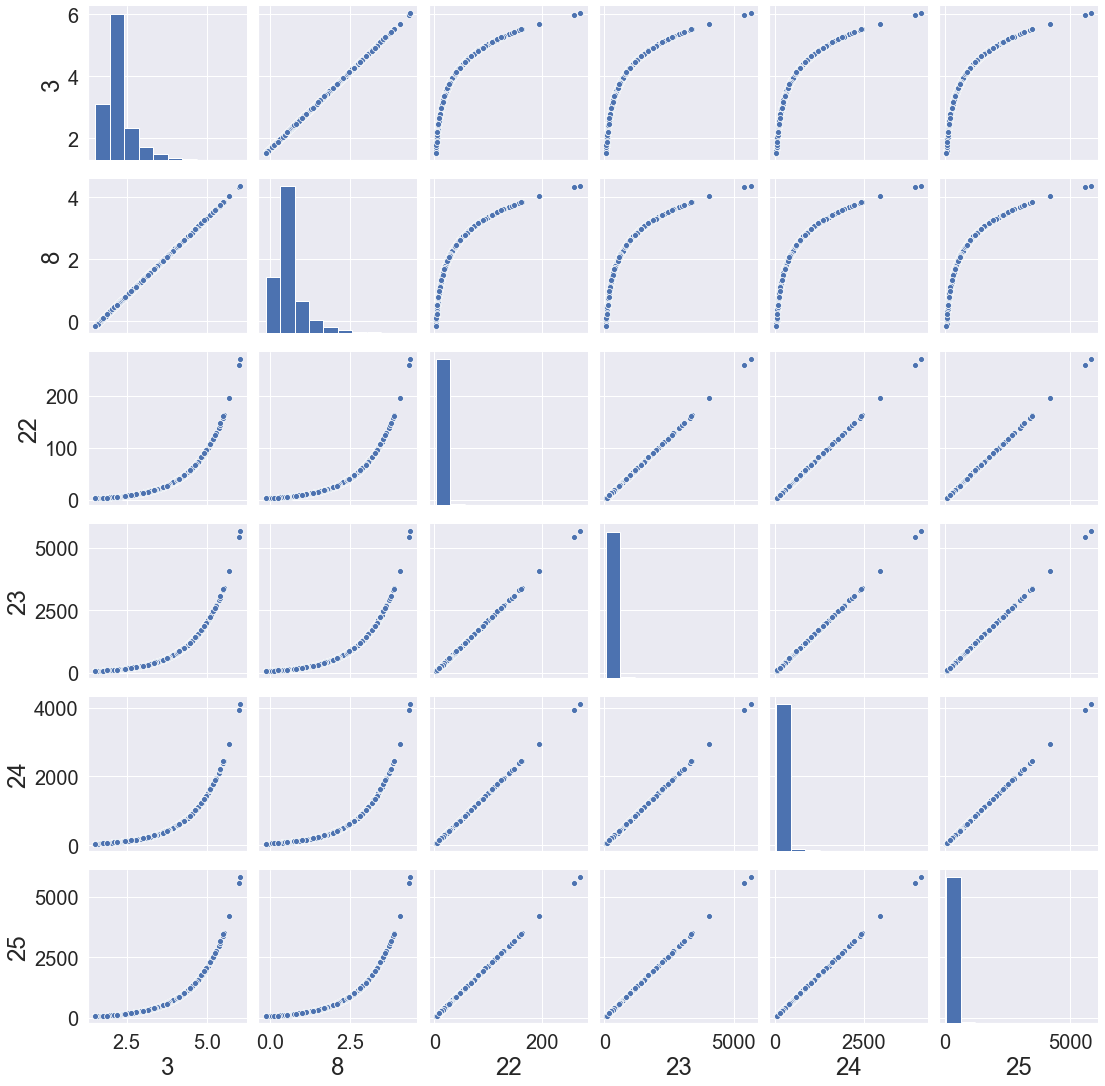

In [61]:
sns.pairplot(pd.DataFrame(X[:, groups[98899]], columns=groups[98899]))

Как видно 3 и 8 признаки связанны линейной зависимостью (фактически для нас они тождественны), точно также оставшиеся признаки из данной категории связанны друг с другом линейным отображением. Кроме того, не трудно показать эти две группы линейно зависимых признаков экспоненциально зависимы:

In [55]:
st.pearsonr(np.exp(X[:, 3]), X[:, 22])

(1.0, 0.0)

Аналогично, для второй вещественной категории имеем:

In [58]:
pd.DataFrame(X[:, groups[100611]], columns=groups[100611]).corr(method='spearman')

,4,9,26,27,28,29
4,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0
26,1.0,1.0,1.0,1.0,1.0,1.0
27,1.0,1.0,1.0,1.0,1.0,1.0
28,1.0,1.0,1.0,1.0,1.0,1.0
29,1.0,1.0,1.0,1.0,1.0,1.0


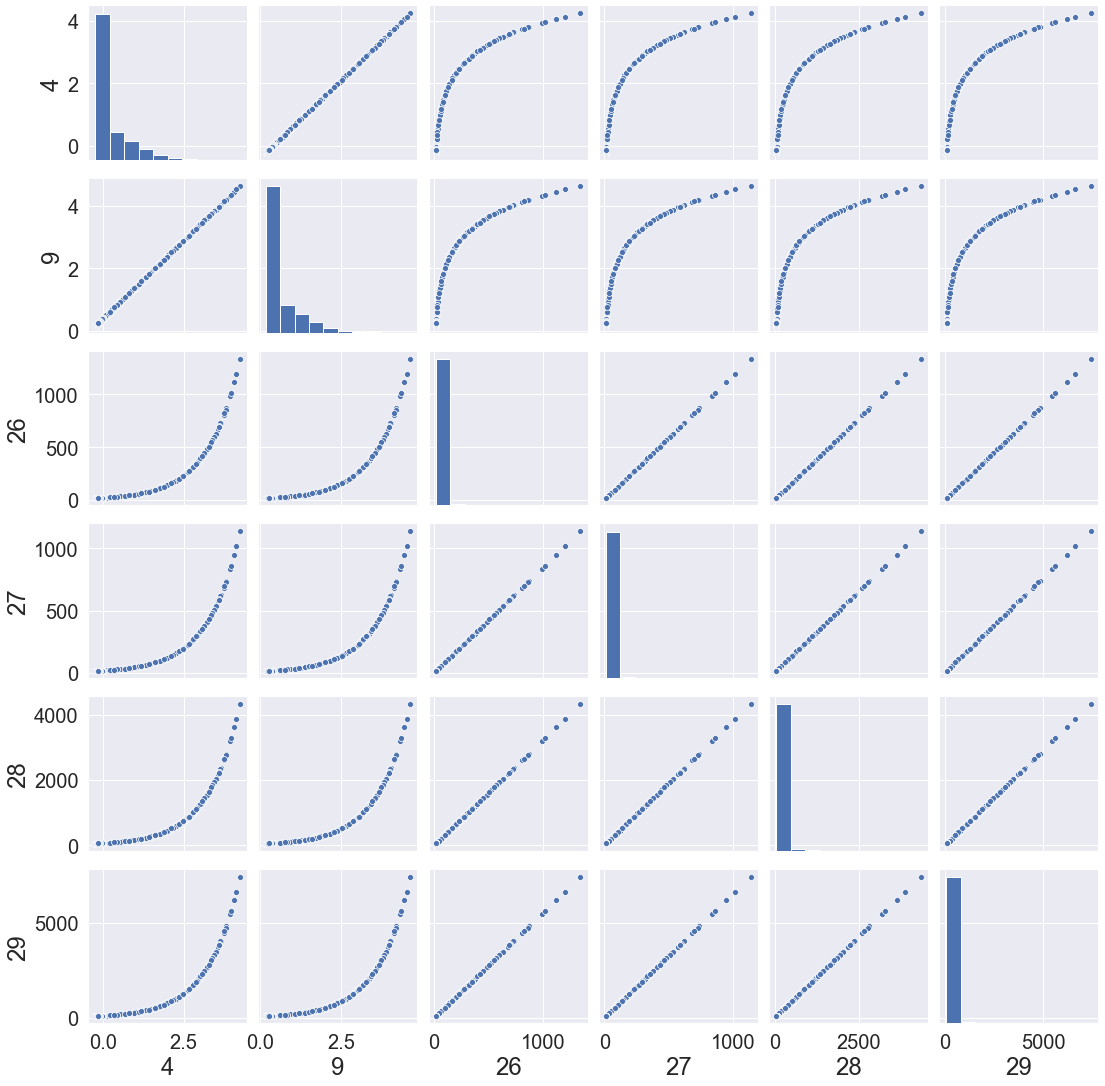

In [57]:
sns.pairplot(pd.DataFrame(X[:, groups[100611]], columns=groups[100611]))

In [126]:
st.pearsonr(np.exp(X[:, 4]), X[:, 26])

(1.0, 0.0)

Перейдем к бинарным признакам.

Для начала посчитаем корреляции (для простоты также используем корреляцию Спирмена, нас интересует только случай тождественности признаков)

In [59]:
corr = pd.DataFrame(X[:, groups[2]], columns=groups[2]).corr(method='spearman')
corr

,0,1,2,5,6,7,10,11,12,13,14,15,16,17,18,19,20,21
0,1.000000,-0.218317,-0.211123,1.000000,-0.218317,-0.211123,1.000000,1.000000,1.000000,1.000000,-0.218317,-0.218317,-0.218317,-0.218317,-0.211123,-0.211123,-0.211123,-0.211123
1,-0.218317,1.000000,-0.907790,-0.218317,1.000000,-0.907790,-0.218317,-0.218317,-0.218317,-0.218317,1.000000,1.000000,1.000000,1.000000,-0.907790,-0.907790,-0.907790,-0.907790
2,-0.211123,-0.907790,1.000000,-0.211123,-0.907790,1.000000,-0.211123,-0.211123,-0.211123,-0.211123,-0.907790,-0.907790,-0.907790,-0.907790,1.000000,1.000000,1.000000,1.000000
5,1.000000,-0.218317,-0.211123,1.000000,-0.218317,-0.211123,1.000000,1.000000,1.000000,1.000000,-0.218317,-0.218317,-0.218317,-0.218317,-0.211123,-0.211123,-0.211123,-0.211123
6,-0.218317,1.000000,-0.907790,-0.218317,1.000000,-0.907790,-0.218317,-0.218317,-0.218317,-0.218317,1.000000,1.000000,1.000000,1.000000,-0.907790,-0.907790,-0.907790,-0.907790
7,-0.211123,-0.907790,1.000000,-0.211123,-0.907790,1.000000,-0.211123,-0.211123,-0.211123,-0.211123,-0.907790,-0.907790,-0.907790,-0.907790,1.000000,1.000000,1.000000,1.000000
10,1.000000,-0.218317,-0.211123,1.000000,-0.218317,-0.211123,1.000000,1.000000,1.000000,1.000000,-0.218317,-0.218317,-0.218317,-0.218317,-0.211123,-0.211123,-0.211123,-0.211123
11,1.000000,-0.218317,-0.211123,1.000000,-0.218317,-0.211123,1.000000,1.000000,1.000000,1.000000,-0.218317,-0.218317,-0.218317,-0.218317,-0.211123,-0.211123,-0.211123,-0.211123
12,1.000000,-0.218317,-0.211123,1.000000,-0.218317,-0.211123,1.000000,1.000000,1.000000,1.000000,-0.218317,-0.218317,-0.218317,-0.218317,-0.211123,-0.211123,-0.211123,-0.211123
13,1.000000,-0.218317,-0.211123,1.000000,-0.218317,-0.211123,1.000000,1.000000,1.000000,1.000000,-0.218317,-0.218317,-0.218317,-0.218317,-0.211123,-0.211123,-0.211123,-0.211123


Находим группы бинарных признаков, порождающие тождественные разбиения:

In [62]:
from scipy.sparse.csgraph import connected_components
n_components, labels = connected_components(csgraph=np.abs(corr.values)==1, directed=False, return_labels=True)
binary_groups = []
for i in range(n_components):
    binary_groups.append(np.array(groups[2])[labels==i])
binary_groups

[array([ 0,  5, 10, 11, 12, 13]),
 array([ 1,  6, 14, 15, 16, 17]),
 array([ 2,  7, 18, 19, 20, 21])]

Оставим только "уникальные" признаки, то есть те, что не связанны напрямую биекцией (при необходимости потом включим их в модель)

In [6]:
data = pd.DataFrame({"cat1" : (X[:, 0] == X[:, 0].max()).astype(float),
                     "cat2" : (X[:, 1] == X[:, 1].max()).astype(float),
                     "cat3" : (X[:, 2] == X[:, 2].max()).astype(float), 
                     "real1" : X[:, 3],
                     "real2" : X[:, 4],
                     "Y" : Y})

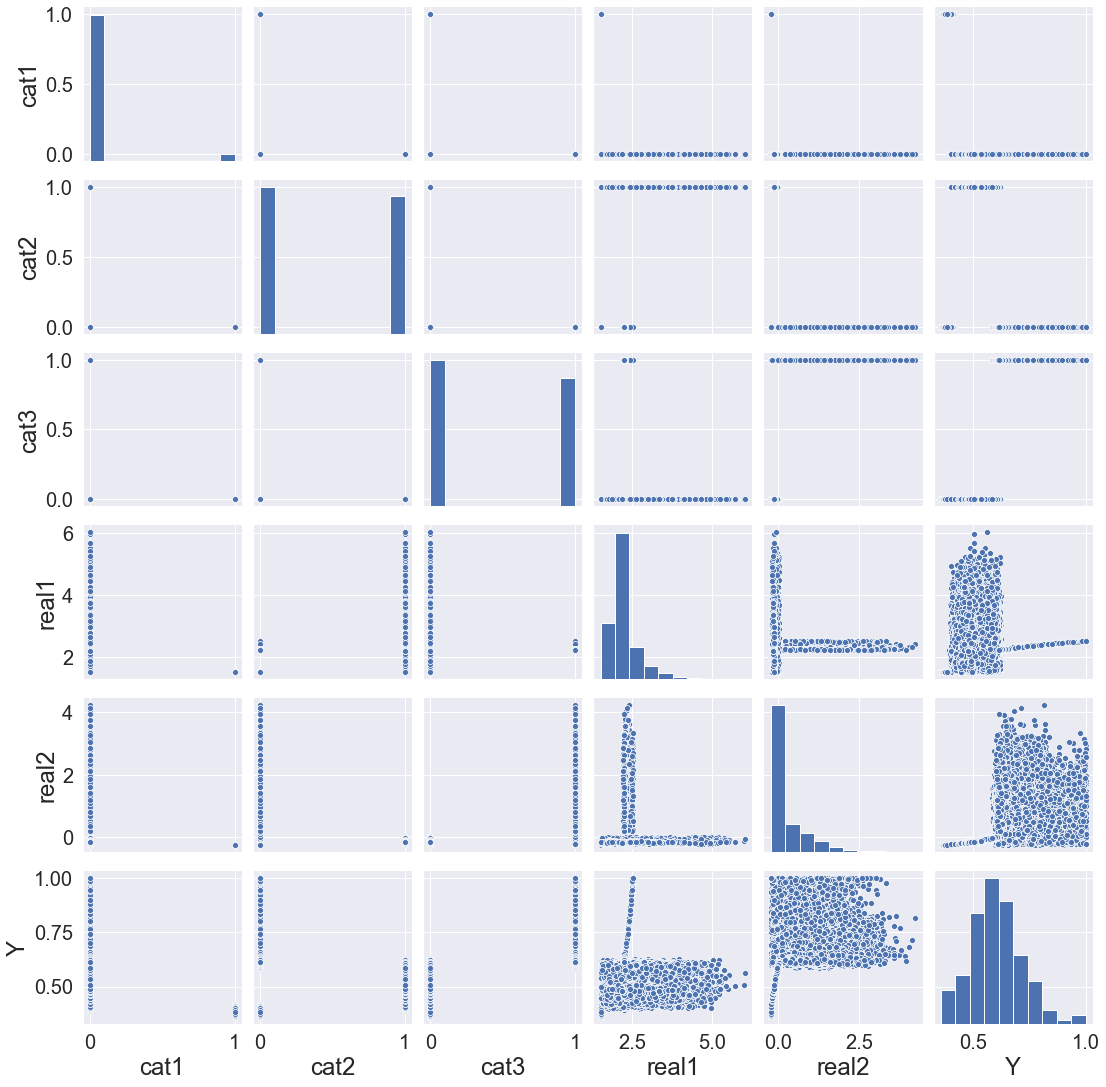

In [69]:
_ = sns.pairplot(data)

Парный график намекает на то, что в даных присутствует несколько модальностей.

Проанализируем на какие группы разбиваются пиксели бинарными признаками:

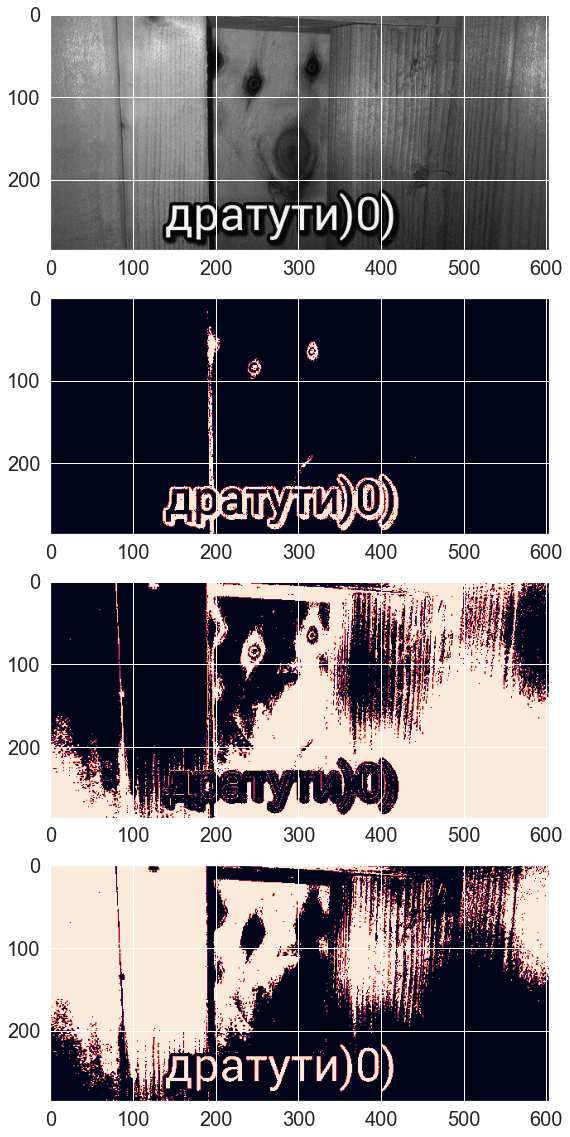

In [76]:
plt.figure(figsize=(30, 20))
plt.subplot(4, 1, 1)
plt.imshow(Y_train,cmap='gray')
plt.subplot(4, 1, 2)
plt.imshow(data['cat1'].values.reshape((286, 604)))
plt.subplot(4, 1, 3)
plt.imshow(data['cat2'].values.reshape((286, 604)))
plt.subplot(4, 1, 4)
plt.imshow(data['cat3'].values.reshape((286, 604)))

Видно что бинарные признаки разбивают все изображение на 3 непересекающиеся категории (это также можно показать явно). Категории при этом отвечают разным уровням яркости.

Проанализируем взаимодействие категориальных признаков с вещественными:

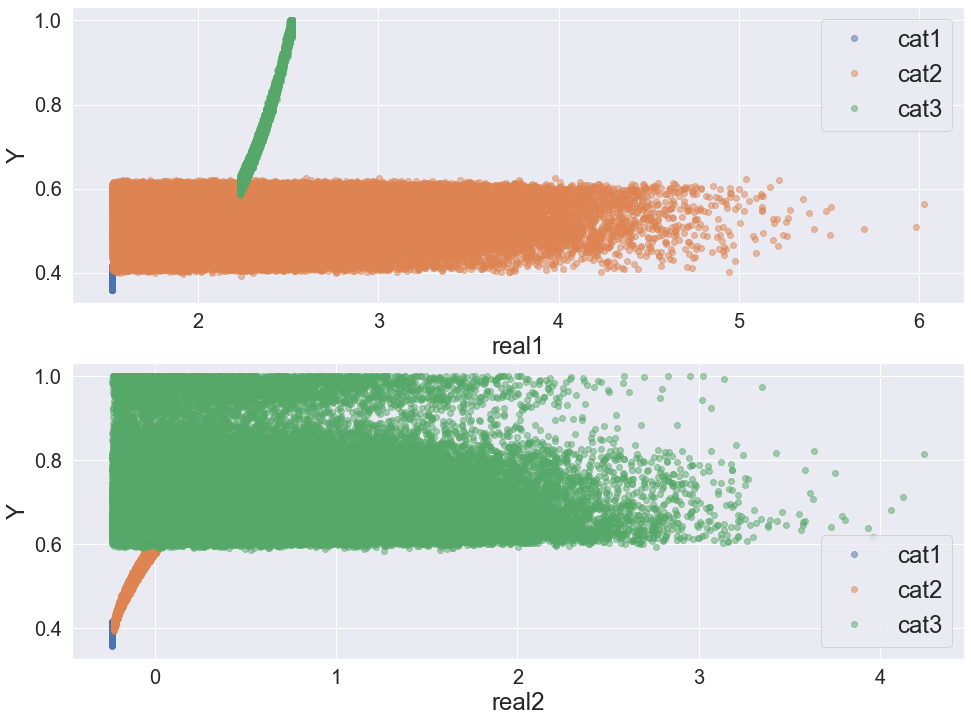

In [291]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 1, 1)
plt.plot(data['real1'][data1['cat1'] == 1], data['Y'][data1['cat1'] == 1], 'o', alpha=0.5, label="cat1")
plt.plot(data['real1'][data1['cat2'] == 1], data['Y'][data1['cat2'] == 1], 'o', alpha=0.5, label="cat2")
plt.plot(data['real1'][data1['cat3'] == 1], data['Y'][data1['cat3'] == 1], 'o', alpha=0.5, label="cat3")
plt.xlabel("real1")
plt.ylabel("Y")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(data['real2'][data1['cat1'] == 1], data['Y'][data1['cat1'] == 1], 'o', alpha=0.5, label="cat1")
plt.plot(data['real2'][data1['cat2'] == 1], data['Y'][data1['cat2'] == 1], 'o', alpha=0.5, label="cat2")
plt.plot(data['real2'][data1['cat3'] == 1], data['Y'][data1['cat3'] == 1], 'o', alpha=0.5, label="cat3")
plt.xlabel("real2")
plt.ylabel("Y")
plt.legend()

Как теперь стало ясно, вещественый призак real1 отвечает за зависимость целевой метки Y внутри группы cat3.

Аналогично вещественный признак real2 отвечает за зависимость внутри категории cat2.

При этом для категории cat1 у нас нет вещественного регрессора.

Исходя из полученных сведений можем записать регрессионную модель как:

In [97]:
model1 = sm.OLS.from_formula("Y ~ cat3* real1  + cat2* real2 -real1 -real2", data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 5.447e+06
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        16:47:27   Log-Likelihood:             5.4518e+05
No. Observations:              172744   AIC:                        -1.090e+06
Df Residuals:                  172739   BIC:                        -1.090e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3824      0.000   3389.349      0.000       0.382       0.383
cat3          -2.5340      0.001  -2003.515      0.000      -2.536      -2.531
cat3:real1     1.2300      0.001   2265.567      0.000       1.229       1.231
cat2           0.2191      0.000   1708.896      0.000       0.219       0.219
cat2:real2     0.7517      0.001   1352.973      0.000       0.751       0.753
==============================================================================
Omnibus:                    28506.124   Durbin-Watson:                   1.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97110.724
Skew:                           0.829   Prob(JB):                         0.00
Kurtosis:                       6.277   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Без применения формальных критериев очевидно, что модель гораздо лучше наивной. 

Посмотрим на распредление остатков:

Text(0.5, 0, 'Residuals')

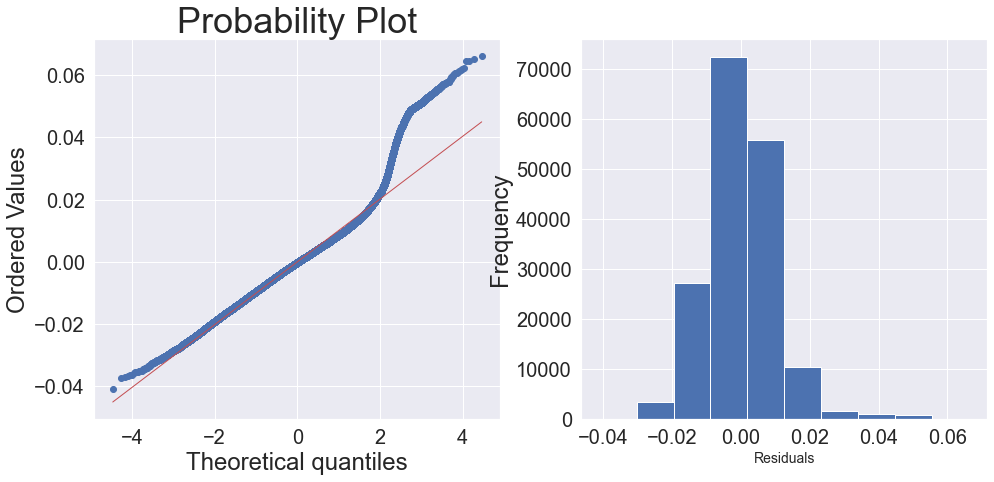

In [65]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
st.probplot(model1.resid, plot=plt)

plt.subplot(122)
model1.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)

Text(0, 0.5, 'Residuals')

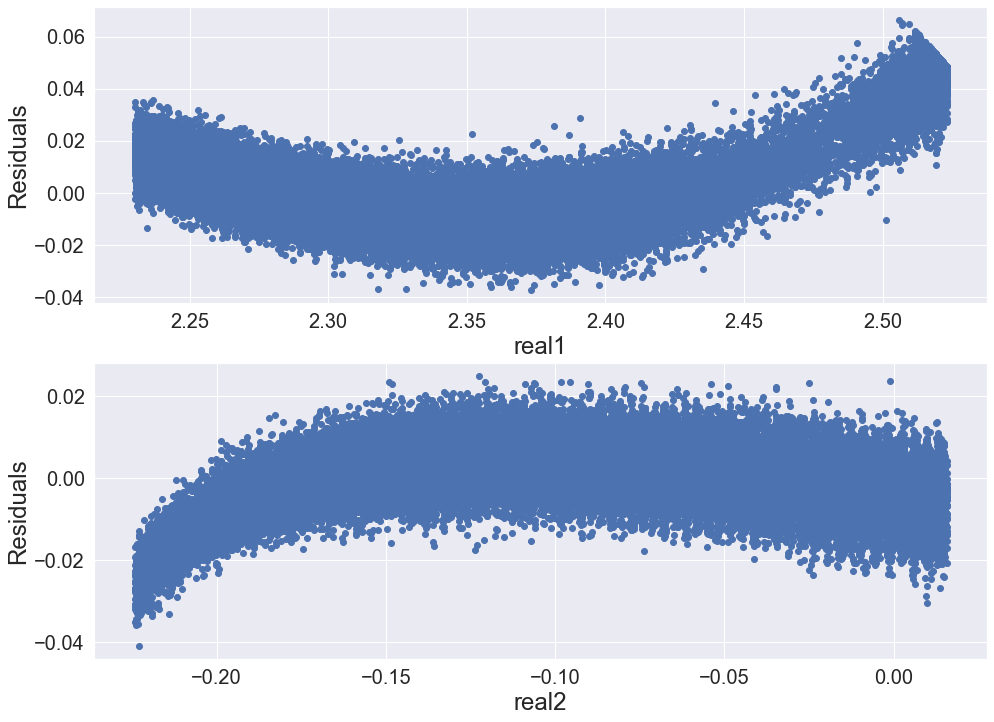

In [131]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 1, 1)
plt.plot(data1['real1'][data1['cat3'] == 1], model1.resid[data1['cat3'] == 1], 'o')
plt.xlabel("real1")
plt.ylabel("Residuals")
plt.subplot(2, 1, 2)
plt.plot(data1['real2'][data1['cat2'] == 1], model1.resid[data1['cat2'] == 1], 'o')
plt.xlabel("real2")
plt.ylabel("Residuals")

Исходя из визуального анализа можно предположить, что необходмо преобразовать вещественные регрессоры

In [17]:
data["real2"].values.min()

-0.23415337472333597

In [122]:
# Значения степеней подобраны руками
def transform(data):
    data1 = data.copy()
    data1["real1_tr"] = (data["real1"].values)**2
    data1["real2_tr"] = (data["real2"].values + 0.235)**0.5
    return data1

In [137]:
data_transformed = transform(data)
model2 = sm.OLS.from_formula("Y ~ cat3 * (real1 + real1_tr)  + cat2* (real2 + real2_tr) \
                             -real1 -real2 -real1_tr -real2_tr ", data=data_transformed).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 8.808e+06
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        17:16:42   Log-Likelihood:             6.2131e+05
No. Observations:              172744   AIC:                        -1.243e+06
Df Residuals:                  172737   BIC:                        -1.243e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3824   7.26e-05   5266.614      0.000       0.382       0.383
cat3              7.5432      0.023    333.862      0.000       7.499       7.587
cat3:real1       -7.3520      0.019   -382.278      0.000      -7.390      -7.314
cat3:real1_tr     1.8254      0.004    446.306      0.000       1.817       1.833
cat2              0.0439      0.001     53.026      0.000       0.042       0.046
cat2:real2        0.2482      0.002    103.563      0.000       0.243       0.253
cat2:real2_tr     0.3517      0.002    212.498      0.000       0.348       0.355
==============================================================================
Omnibus:                     2240.057   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3491.541
Skew:                           0.131   Prob(JB):                         0.00
Kurtosis:                       3.646   Cond. No.                     7.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
resid1 = model2.resid[data1['cat1'] == 1]
resid2 = model2.resid[data1['cat2'] == 1]
x2 = data_transformed['real2'][data_transformed['cat2'] == 1]
resid3 = model2.resid[data1['cat3'] == 1]
x3 = data_transformed['real1'][data_transformed['cat3'] == 1]

Text(0, 0.5, 'Residuals')

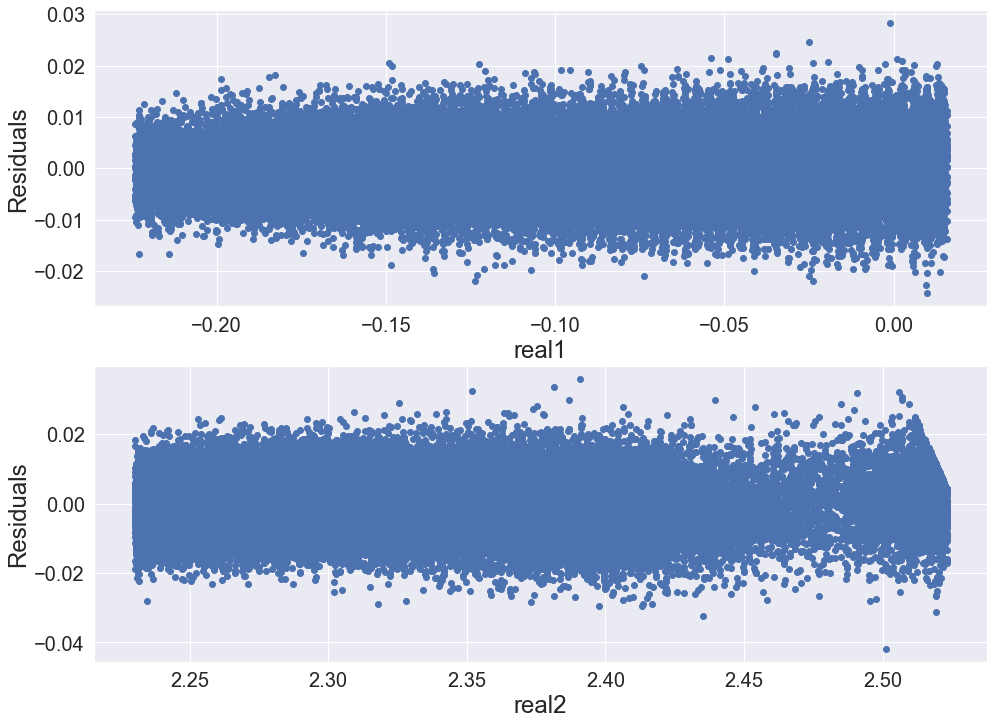

In [163]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 1, 1)
plt.plot(x2, resid2, 'o')
plt.xlabel("real1")
plt.ylabel("Residuals")
plt.subplot(2, 1, 2)
plt.plot(x3, resid3, 'o')
plt.xlabel("real2")
plt.ylabel("Residuals")

Text(0.5, 0, 'Residuals')

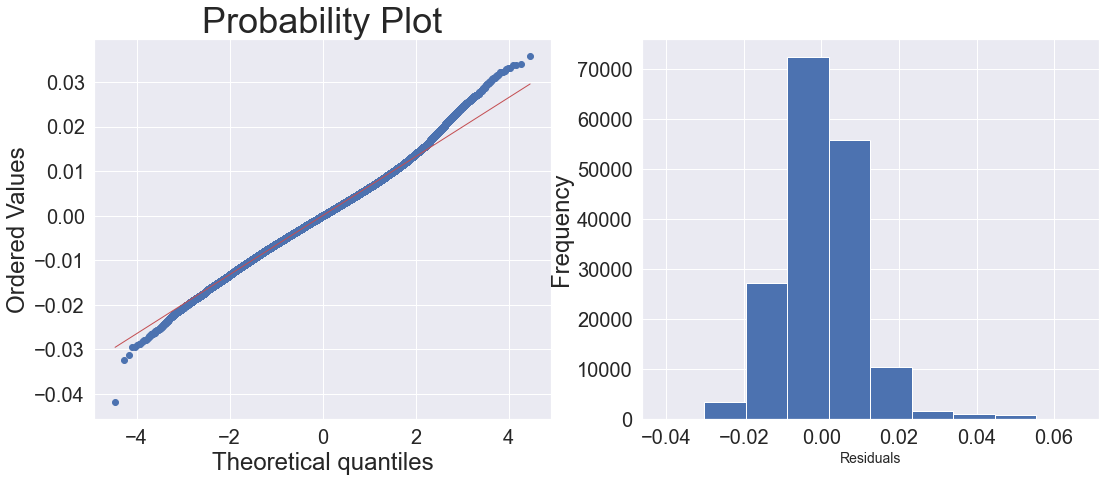

In [127]:
plt.figure(figsize=(18, 7))
plt.subplot(121)
st.probplot(model2.resid, plot=plt)

plt.subplot(122)
model1.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)

Как видно, добавление в модель квадрата от регрессора real1 и корня от регрессора real2 улучшает модель по информационным критериям BIC и AIC. Кроме того коэффициенты при данных признаках статистичекси значимо отличаются от нуля по критерию Стъюдента. 

Однако дисперсия шума при регрессии на образцы категории cat2 выглядит гетероскедастичной, а QQ-график всей модели в целом намекает на ненормальность остатков.

Проанализируем остатки получившейся модели в контексте регрессии на образцы каждой категории в отдельности.

In [214]:
# het_breuschpagan из statsmodels.stats.diagnostic почему-то работает некорректно
# и спокойно отвергает даже искусственно сгенерированный гомоскедастичный шум
# statsmodels.__version__ == '0.11.1'
# Поэтому для проверки гомоскедастичности пользуемся другой реализацией
# https://stackoverflow.com/questions/30061054/ols-breusch-pagan-test-in-python

import numpy as np
from sklearn.linear_model import LinearRegression

def breusch_pagan_test(x, y):
    '''
    Breusch-Pagan test for heteroskedasticity in a linear regression model:
    H_0 = No heteroskedasticity.
    H_1 = Heteroskedasticity is present.

    Inputs:
    x = a numpy.ndarray containing the predictor variables. Shape = (nSamples, nPredictors).
    y = a 1D numpy.ndarray containing the response variable. Shape = (nSamples, ).

    Outputs a list containing three elements:
    1. the Breusch-Pagan test statistic.
    2. the p-value for the test.
    3. the test result.
    '''

    if y.ndim != 1:
        raise SystemExit('Error: y has more than 1 dimension.')
    if x.shape[0] != y.shape[0]:
        raise SystemExit('Error: the number of samples differs between x and y.')
    else:
        n_samples = y.shape[0]

    # fit an OLS linear model to y using x:
    lm = LinearRegression()
    lm.fit(x, y)

    # calculate the squared errors:
    err = (y - lm.predict(x))**2

    # fit an auxiliary regression to the squared errors:
    # why?: to estimate the variance in err explained by x
    lm.fit(x, err)
    pred_err = lm.predict(x)
    del lm

    # calculate the coefficient of determination:
    ss_tot = sum((err - np.mean(err))**2)
    ss_res = sum((err - pred_err)**2)
    r2 = 1 - (ss_res / ss_tot)
    del err, pred_err, ss_res, ss_tot

    # calculate the Lagrange multiplier:
    LM = n_samples * r2
    del r2

    # calculate p-value. degrees of freedom = number of predictors.
    # this is equivalent to (p - 1) parameter restrictions in Wikipedia entry.
    pval = st.distributions.chi2.sf(LM, x.shape[1])

    if pval < 0.01:
        test_result = 'Heteroskedasticity present at 99% CI.'
    elif pval < 0.05:
        test_result = 'Heteroskedasticity present at 95% CI.'
    else:
        test_result = 'No significant heteroskedasticity.'
    return [LM, pval, test_result]

## Категория cat3

Text(0.5, 0, 'Residuals')

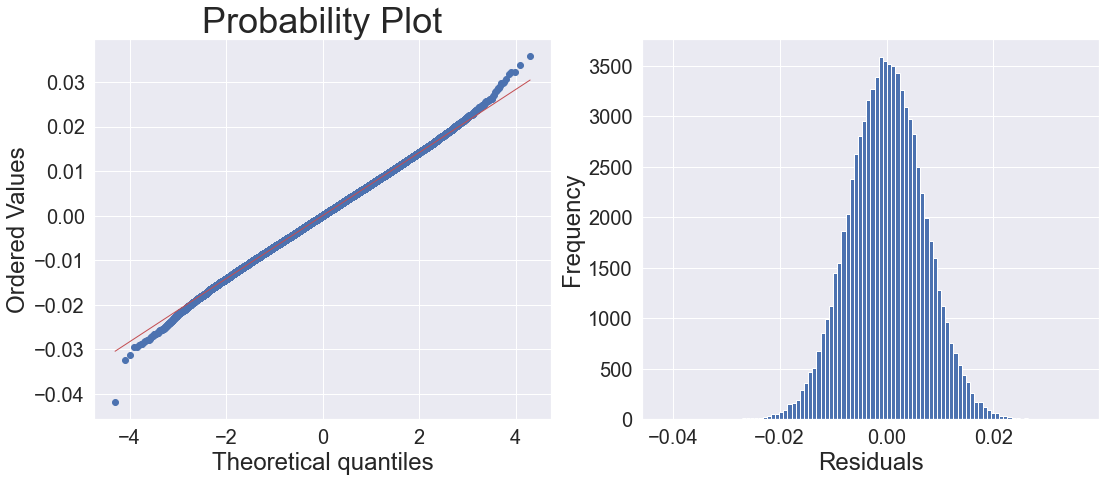

In [222]:
plt.figure(figsize=(18, 7))
plt.subplot(121)
st.probplot(resid3, plot=plt)

plt.subplot(122)
resid3.plot.hist(bins=100)
plt.xlabel('Residuals')

In [244]:
from statsmodels.stats.diagnostic import het_breuschpagan
print(f'Нормальность ошибок: {st.shapiro(resid3)}')
print(f'Несмещенность: {st.wilcoxon(resid3)}')
print(f'Гомоскедастичность: {breusch_pagan_test(x3.values[:, None], resid3.values)}')

Нормальность ошибок: (0.9997175335884094, 1.0574109587935254e-08)
Несмещенность: WilcoxonResult(statistic=1630001639.0, pvalue=0.9565357566441284)
Гомоскедастичность: [1747.9250599336979, 0.0, 'Heteroskedasticity present at 99% CI.']


/Users/pandreev/mypython/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Видим, что при регрессии на образцы категории cat3 остатки визуально нормальны, однако при формальной проверки эта гипотеза отвергается. Также отвергается гипотеза о гомоскедастичности. Кроме того, мы не можем отвергнуть гипотезу о несмещенности остатков на уровне значимости 0.05.

## Категория cat2

Text(0.5, 0, 'Residuals')

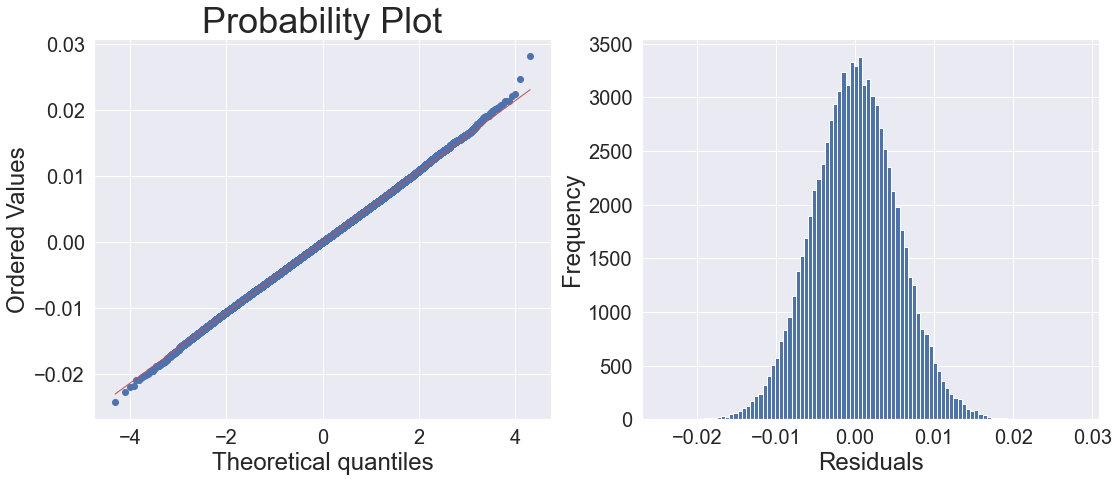

In [223]:
plt.figure(figsize=(18, 7))
plt.subplot(121)
st.probplot(resid2, plot=plt)

plt.subplot(122)
resid2.plot.hist(bins=100)
plt.xlabel('Residuals')

In [242]:
from statsmodels.stats.diagnostic import het_breuschpagan
print(f'Нормальность ошибок: {st.shapiro(resid2)}')
print(f'Несмещенность: {st.wilcoxon(resid2)}')
print(f'Гомоскедастичность: {breusch_pagan_test(x2.values[:, None], resid2.values)}')

Нормальность ошибок: (0.9998824000358582, 0.0006281650857999921)
Несмещенность: WilcoxonResult(statistic=1745159965.0, pvalue=0.5807226273272938)
Гомоскедастичность: [1099.7573903452712, 3.7291905990243715e-241, 'Heteroskedasticity present at 99% CI.']


Аналогично cat3.

## Категория cat1

Text(0.5, 0, 'Residuals')

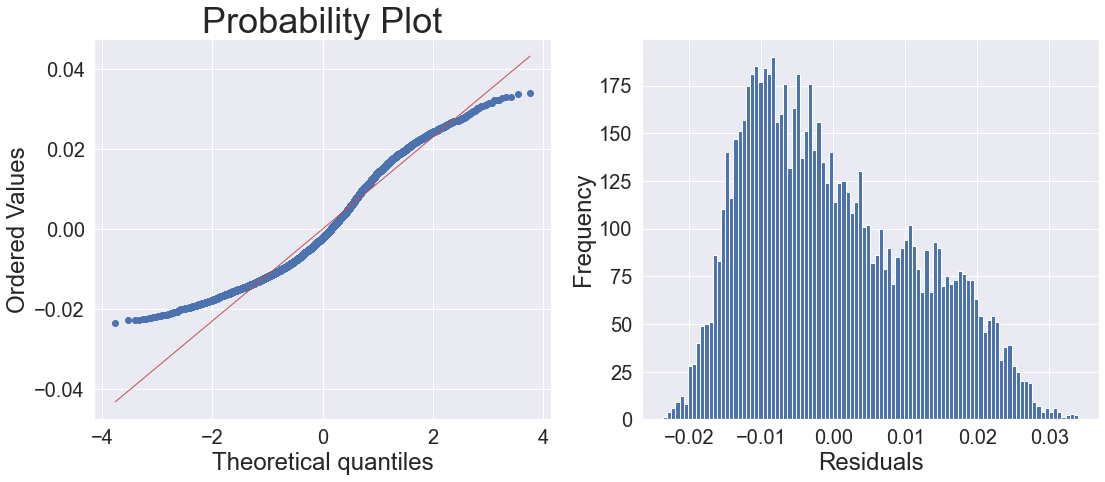

In [255]:
plt.figure(figsize=(18, 7))
plt.subplot(121)
st.probplot(resid1, plot=plt)

plt.subplot(122)
resid1.plot.hist(bins=100)
plt.xlabel('Residuals')

In [254]:
print(f'Нормальность ошибок: {st.shapiro(resid1)}')
print(f'Несмещенность: {st.wilcoxon(resid1)}')

Нормальность ошибок: (0.9612051844596863, 1.9029633145531016e-42)
Несмещенность: WilcoxonResult(statistic=16692848.0, pvalue=0.0009543484414554329)


/Users/pandreev/mypython/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Для категории cat1 отсутствуют вещественые регрессоры (real1 и real2 в её пределах константы), поэтому по сути мы оцениваем все значения данной категории константой (выборочное матожидание). Так как исходное распредление внутри данной категории не является нормальным, то и остатки распредлены существенно ненормально, что мы и наблюдаем на QQ графике. 

Именна эта категория вносит основной вклад в ненормальность ошибок всей модели.

$max(y)/min(y)$ < 10 преобразование Бокса-Кокса для коррекции гетероскедастичности использовать не будем.

Сильных выбросов в данных не наблюдается, поэтому корректировать модель в этом плане нет необходимости.

## Результат

Посмотрим теперь на предсказания модели на тестовой выборке:

In [260]:
test = X_test.reshape(-1, 35)
data_test = pd.DataFrame({"cat1" : (test[:, 0] == test[:, 0].max()).astype(float),
                     "cat2" : (test[:, 1] == test[:, 1].max()).astype(float),
                     "cat3" : (test[:, 2] == test[:, 2].max()).astype(float), 
                     "real1" : test[:, 3],
                     "real2" : test[:, 4]})
Y_test = model2.predict(transform(data_test))

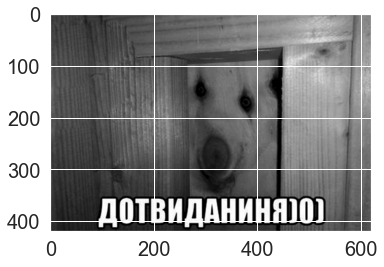

In [261]:
plt.imshow(Y_test.values.reshape((420, 620)),cmap='gray')

Качество полученного изображения можно оценить как высокое.

## Вывод

В ходе работы были получены следующие результаты:

1. Итоговый коэффициент детерминации: **0.997**
2. Интерпретированы признаки (0, 1, 2, 3, 4): 3 бинарных признака (0, 1, 2) соответсвуют разбиению пикселей изображения на категории в соответсвии с уровнем яркости (то есть это некоторые зашумленные пороговые функции от значений пикселей), 2 вещественных признака (3, 4) являются некоторыми (зашумленными) функциями пикселей в пределах своих категорий ($ Y_{pixel} \propto x +\sqrt{x}$ или $x +x^2$).
3. Остальные признаки (кроме 0, 1, 2, 3, 4) являются функциями первых пяти.
4. Остатки полученной регрессионной модели формально ненормальны и негетероскедастичны, однако в пределах категорий, задаваемых признаками 1 и 2 (cat2 и cat3 в рамках данной работы), исходя из визуального анализа, можно судить, что предположение о нормальности нарушается не сильно. 